# Lab Weeks 8 for Monday Tutorial

Author: Dr. Amirhassan MONAJEMI. Modified by Xiao CAO

### part 1:  GLCM-based Texture Analysis
1. Read images 
- collage1.bmp
- 20230324_105524gl.jpg
 
2. Convert them the GL if it's necessary 
3. Complete the glcm function. 
4. Compute 4 GLCM matrices for distance=d=[3] , theta= [0,90] for each texture
5. Compute F2 for each GLCM matrix. 


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [10]:
"""
img: The input grayscale image.
GL: Number of gray levels.
d: The distance between pixel pairs.
t: The angle (in degrees) specifying the direction of pixel pairs.
"""
def am_glcm_faster( img , GL , d , t):
    ccmm = np.zeros([GL, GL])
    #Make sure it's not out of boundary
    if t==0:
        im_target = img[:,d:]
        im_value = img[:,:-d]
        '''
        1 2 3 4 5 6 7 8 9 10  original
        1 2 3 4 5 6 7 8 9     target
          2 3 4 5 6 7 8 9 10  value
        '''
        
    elif t==45:
        im_target = img[d:,d:]
        im_value = img[:-d, :-d]
    elif t==90:
        im_target = img[d:,:]
        im_value = img[:-d, :]
    elif t==135:
        im_target = img[:-d, :-d]
        im_value = img[d:,d:]
    else:
        raise NotImplementedError('t options: 0, 45, 90, 135 only')
    assert im_target.shape==im_value.shape
    ref_gls = np.unique(im_value)
    # print(ref_gls)
    for ref in ref_gls:
        #ref: 80
        target_values = im_target[im_value == ref]#select the position that have the specific value. Prepare for later's d and t
        #target_values: [ 98,  89,  99, 100]
        target_gls = np.unique(target_values)
        #[ 89,  98,  99, 100]
        for target in target_gls:
               ccmm[ref, target] = (target_values==target).sum()
    return ccmm


In [11]:
glcm_energy = lambda gl : np.sum(np.multiply(gl,gl))


In [12]:

def am_power(a):
    dim1 = a.shape
    
    if len(dim1)==2:
        sz = dim1[0] * dim1[1] 
    elif len(dim1)==3:
        sz = dim1[0] * dim1[1] * dim1[2]        
    pa = np.sum( a ** 2.0) / sz    
    
    return pa

def am_entropy(nimg , N=256):
    M = nimg.shape
    ssz = M[0] * M[1]
    hist,bins = np.histogram(nimg.flatten(),N,[0,N])
    hist = hist / ssz
    ent = -np.sum( hist * np.log2(hist+0.000001))
    return ent


In [7]:
a = cv2.imread('/Users/cx/Documents/GitHub/CS4243_2023_images_small/collage1.bmp',0)
b = cv2.imread('/Users/cx/Documents/GitHub/CS4243_2023_images_small/20230324_105524gl.jpg',0)


a = a[:512 , :512]
b = b[:512 , :512]

print(a.shape , b.shape)

(512, 512) (512, 512)


In [8]:
aglcm30 = am_glcm_faster( a , 256, 3, 0)
bglcm30 = am_glcm_faster( b , 256, 3, 0) 
aglcm390 = am_glcm_faster( a , 256, 3, 90)
bglcm390 = am_glcm_faster( b , 256, 3, 90) 

print( 'aglcm30 energy= %e \tbglcm30 energy=%e' %(glcm_energy(aglcm30), glcm_energy(bglcm30)) )
print( 'aglcm390 energy= %e \tbglcm390 energy=%e' %(glcm_energy(aglcm390), glcm_energy(bglcm390)) )

aglcm30 energy= 1.232332e+08 	bglcm30 energy=1.325814e+08
aglcm390 energy= 2.364431e+07 	bglcm390 energy=1.509953e+08


(<AxesSubplot: >,
 (-0.5, 255.5, 255.5, -0.5))

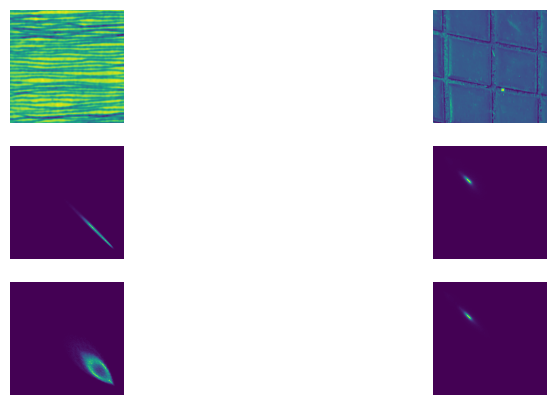

In [9]:
# showing the result

plt.figure(figsize=(10, 5))
plt.subplot(321), plt.imshow(a), plt.axis('off') 
plt.subplot(322), plt.imshow(b) , plt.axis('off')
plt.subplot(323), plt.imshow(aglcm30), plt.axis('off') 
plt.subplot(324), plt.imshow(bglcm30) , plt.axis('off')
plt.subplot(325), plt.imshow(aglcm390), plt.axis('off') 
plt.subplot(326), plt.imshow(bglcm390) , plt.axis('off')
                                            

### Part2: Create Laws 5*5 filter
- You should define L5,E5,S5 Laws kernel according to tutorial slides
- You should combine 1D Laws kernels into 2D kernel
- Apply to the required two images 
IMG_0054.JPG & 6ae-007.jpg
- Calculate the image power and answer the coursework question

In [3]:
c = cv2.imread('/Users/cx/Documents/GitHub/CS4243_2023_images_small/IMG_0054.JPG',0)
d = cv2.imread('/Users/cx/Documents/GitHub/CS4243_2023_images_small/6ae-007.jpg',0)

print(c.shape , d.shape)

(2592, 3888) (788, 1400)


(<AxesSubplot: >,
 (-0.5, 1399.5, 787.5, -0.5))

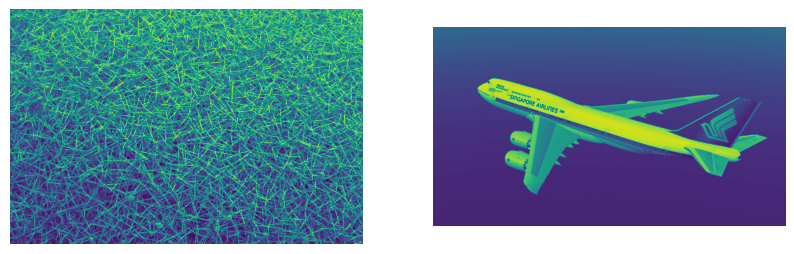

In [4]:
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(c), plt.axis('off') 
plt.subplot(122), plt.imshow(d) , plt.axis('off')


In [19]:
# create figure
fig = plt.figure(figsize=(16*2,16*2))

# setting values to rows and column variables
rows = 4
columns = 4


<Figure size 3200x3200 with 0 Axes>

In [7]:
L5=np.array([1,4,6,4,1])
E5=np.array([-1,-2,0,2,1])
S5=np.array([-1,0,2,0,-1])
R5=np.array([1,-4,6,-4,1])
llist = [L5 , E5 , S5, R5]

laws = []
for xs in llist:
    for ys in llist:
        xs= np.reshape(xs,(5,1))
        ys = np.reshape(ys,(1,5))
        re = np.matmul(xs,ys)  
        laws.append(re)

In [8]:
laws

[array([[ 1,  4,  6,  4,  1],
        [ 4, 16, 24, 16,  4],
        [ 6, 24, 36, 24,  6],
        [ 4, 16, 24, 16,  4],
        [ 1,  4,  6,  4,  1]]),
 array([[ -1,  -2,   0,   2,   1],
        [ -4,  -8,   0,   8,   4],
        [ -6, -12,   0,  12,   6],
        [ -4,  -8,   0,   8,   4],
        [ -1,  -2,   0,   2,   1]]),
 array([[-1,  0,  2,  0, -1],
        [-4,  0,  8,  0, -4],
        [-6,  0, 12,  0, -6],
        [-4,  0,  8,  0, -4],
        [-1,  0,  2,  0, -1]]),
 array([[  1,  -4,   6,  -4,   1],
        [  4, -16,  24, -16,   4],
        [  6, -24,  36, -24,   6],
        [  4, -16,  24, -16,   4],
        [  1,  -4,   6,  -4,   1]]),
 array([[ -1,  -4,  -6,  -4,  -1],
        [ -2,  -8, -12,  -8,  -2],
        [  0,   0,   0,   0,   0],
        [  2,   8,  12,   8,   2],
        [  1,   4,   6,   4,   1]]),
 array([[ 1,  2,  0, -2, -1],
        [ 2,  4,  0, -4, -2],
        [ 0,  0,  0,  0,  0],
        [-2, -4,  0,  4,  2],
        [-1, -2,  0,  2,  1]]),
 array([[ 1, 

original image power c=  15875.908085340141
power of c 0 th filter response= 65025.0
power of c 1 th filter response= 26516.913607931812
power of c 2 th filter response= 15250.99604661621
power of c 3 th filter response= 11565.094316002387
power of c 4 th filter response= 23527.957898114808
power of c 5 th filter response= 12668.145299183465
power of c 6 th filter response= 4854.93444801272
power of c 7 th filter response= 3569.828229587398
power of c 8 th filter response= 15281.158237656702
power of c 9 th filter response= 5122.895274971581
power of c 10 th filter response= 1424.690645560255
power of c 11 th filter response= 1652.4502355498716
power of c 12 th filter response= 12706.12705543013
power of c 13 th filter response= 4238.277237574937
power of c 14 th filter response= 1977.4324915139334
power of c 15 th filter response= 6650.32730854354


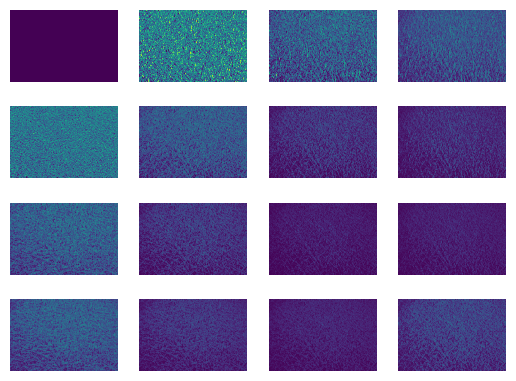

In [21]:
ppp=[]
fff= []

for i in range(16):
    f1 = cv2.filter2D(src=c, ddepth=-1, kernel= laws[i])
    idx=f"44{i+1}"
    # plt.subplot(4, 4, i+1, plt.imshow(f1), plt.axis('off') )
    plt.subplot(4, 4, i+1)  # Starting from the second position
    plt.imshow(f1)
    plt.axis('off')
    ppp.append(am_power(f1))
    fff.append(f1)

print('original image power c= ' , am_power(c) )
for i in range(16):
    print('power of c', i ,'th filter response=', ppp[i] )

original image power d=  7340.401925308194
power of d 0 th filter response= 65025.0
power of d 1 th filter response= 2463.303386511965
power of d 2 th filter response= 1331.7335505801304
power of d 3 th filter response= 1494.9500108774475
power of d 4 th filter response= 2915.097703045685
power of d 5 th filter response= 1423.2010152284263
power of d 6 th filter response= 591.0361675126903
power of d 7 th filter response= 687.396610768673
power of d 8 th filter response= 2007.7981490210298
power of d 9 th filter response= 859.6765817621465
power of d 10 th filter response= 298.1410949963742
power of d 11 th filter response= 474.091458484409
power of d 12 th filter response= 2448.5714312907903
power of d 13 th filter response= 1233.7981073241478
power of d 14 th filter response= 799.9226713197969
power of d 15 th filter response= 1180.9237726613487


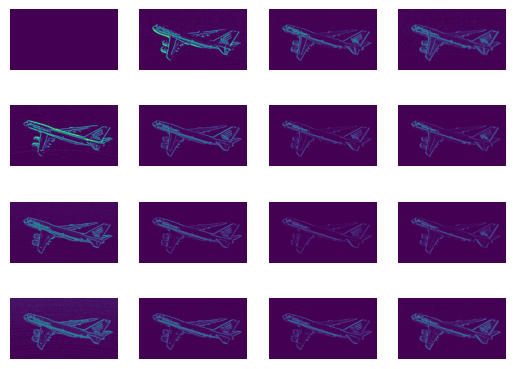

In [22]:
ppp=[]
fff= []

for i in range(16):
    f1 = cv2.filter2D(src=d, ddepth=-1, kernel= laws[i])
    idx=f"44{i+1}"
    # plt.subplot(4, 4, i+1, plt.imshow(f1), plt.axis('off') )
    plt.subplot(4, 4, i+1)  # Starting from the second position
    plt.imshow(f1)
    plt.axis('off')
    ppp.append(am_power(f1))
    fff.append(f1)

print('original image power d= ' , am_power(d) )
for i in range(16):
    print('power of d', i ,'th filter response=', ppp[i] )



### part 3:
1. Apply lowpass and highpass filters, hlp and hhp.
2. compute the power of the filtered images and show them.
3. Then down sample (or zoom‐out) x and y to 25% of the original size
4. Utilize Open CV resize function and its INTER_LINEAR option. Resulting images are xd and yd. Repeat the process

hlp                 

[0.111,0.111,0.111]  

[0.111,0.111,0.111]  
    
[0.111,0.111,0.111]  

hhp

[-1,-1,-1]

[-1, 8,-1]

[-1,-1,-1]



In [23]:
x = cv2.imread('/Users/cx/Documents/GitHub/CS4243_2023_images_small/34.jpg',0)
y = cv2.imread('/Users/cx/Documents/GitHub/CS4243_2023_images_small/68.JPG',0)

print(x.shape , y.shape)

(2281, 2980) (2592, 3888)


Corrupt JPEG data: bad Huffman code


(<AxesSubplot: >,
 (-0.5, 3887.5, 2591.5, -0.5))

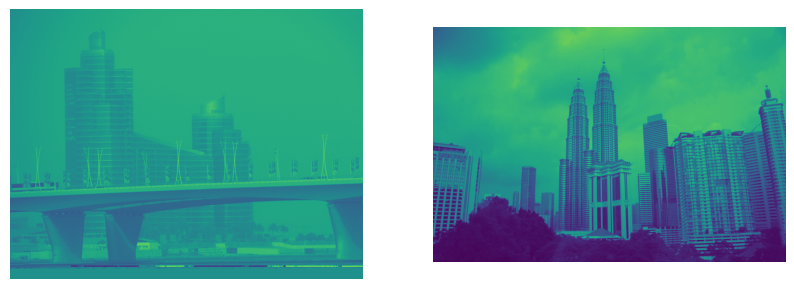

In [24]:
# showing the result
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(x), plt.axis('off') 
plt.subplot(122), plt.imshow(y) , plt.axis('off')

In [25]:
lp = np.ones((3,3)) * 0.111
hp = -np.ones((3,3))
hp[1,1]=8


In [26]:
print(lp)
print(hp)
print('power of original x= %e' %(am_power(x)) )
print('power of original y= %e' %(am_power(y)) )


[[0.111 0.111 0.111]
 [0.111 0.111 0.111]
 [0.111 0.111 0.111]]
[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]
power of original x= 2.011282e+04
power of original y= 1.489006e+04


In [27]:
flpx = cv2.filter2D(src=x, ddepth=-1, kernel= lp)
fhpx = cv2.filter2D(src=x, ddepth=-1, kernel= hp)

flpy = cv2.filter2D(src=y, ddepth=-1, kernel= lp)
fhpy = cv2.filter2D(src=y, ddepth=-1, kernel= hp)

In [28]:
print('power of flpx= %e \t Percentage: %5.2f' %(am_power(flpx) , am_power(flpx)/am_power(x)*100 ) )  
print('power of fhpx= %e \t Percentage: %5.2f' %(am_power(fhpx) , am_power(fhpx)/am_power(x)*100 ) )
print('power of flpy= %e \t Percentage: %5.2f' %(am_power(flpy) , am_power(flpy)/am_power(y)*100 ) )
print('power of fhpy= %e \t Percentage: %5.2f' %(am_power(fhpy) , am_power(fhpy)/am_power(y)*100 ) )


power of flpx= 2.006436e+04 	 Percentage: 99.76
power of fhpx= 2.262246e+02 	 Percentage:  1.12
power of flpy= 1.482550e+04 	 Percentage: 99.57
power of fhpy= 3.531668e+02 	 Percentage:  2.37


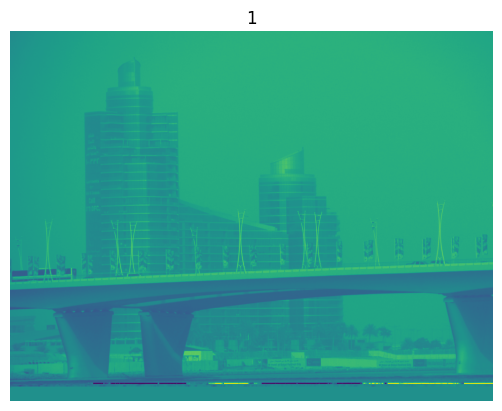

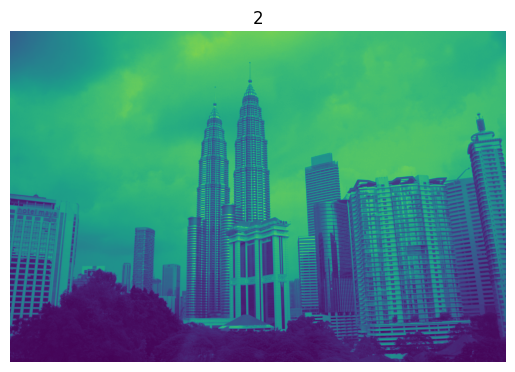

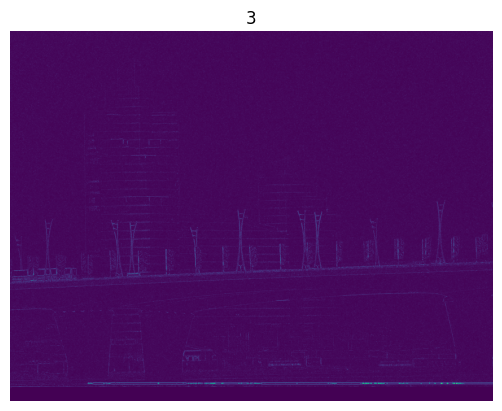

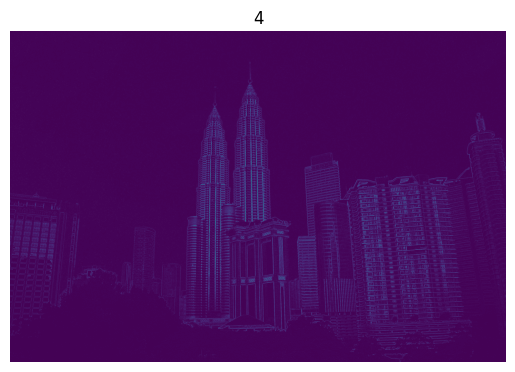

In [29]:
fig.add_subplot(2,2,1) 
plt.imshow(flpx)
plt.axis('off')
plt.title(1)
plt.show()
fig.add_subplot(2,2,2) 
plt.imshow(flpy)
plt.axis('off')
plt.title(2)
plt.show()
fig.add_subplot(2,2,3) 
plt.imshow(fhpx)
plt.axis('off')
plt.title(3)
plt.show()
fig.add_subplot(2,2,4) 
plt.imshow(fhpy)
plt.axis('off')
plt.title(4)
plt.show()


In [30]:
xd = cv2.resize(x, None,fx=0.25, fy=0.25 , interpolation = cv2.INTER_LINEAR) 
yd = cv2.resize(y, None,fx=0.25, fy=0.25 , interpolation = cv2.INTER_LINEAR) 

print( 'size & power:',xd.shape, am_power(xd) , yd.shape , am_power(yd) )

size & power: (570, 745) 20139.25621806193 (648, 972) 14899.361336559468


In [23]:
flpdx = cv2.filter2D(src=xd, ddepth=-1, kernel= lp)
fhpdx = cv2.filter2D(src=xd, ddepth=-1, kernel= hp)

flpdy = cv2.filter2D(src=yd, ddepth=-1, kernel= lp)
fhpdy = cv2.filter2D(src=yd, ddepth=-1, kernel= hp)


In [24]:
print('power of flpx= %e \t Percentage: %5.2f' %(am_power(flpdx) , am_power(flpdx)/am_power(xd)*100 ) )
print('power of fhpx= %e \t Percentage: %5.2f' %(am_power(fhpdx) , am_power(fhpdx)/am_power(xd)*100 ) )
print('power of flpy= %e \t Percentage: %5.2f' %(am_power(flpdy) , am_power(flpdy)/am_power(yd)*100 ) )
print('power of fhpy= %e \t Percentage: %5.2f' %(am_power(fhpdy) , am_power(fhpdy)/am_power(yd)*100 ) )


power of flpx= 2.006692e+04 	 Percentage: 99.64
power of fhpx= 7.386142e+02 	 Percentage:  3.67
power of flpy= 1.470547e+04 	 Percentage: 98.70
power of fhpy= 2.754279e+03 	 Percentage: 18.49


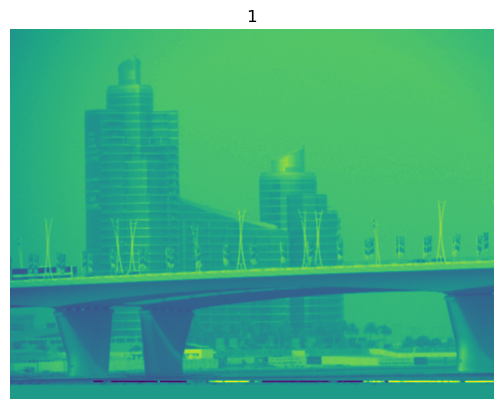

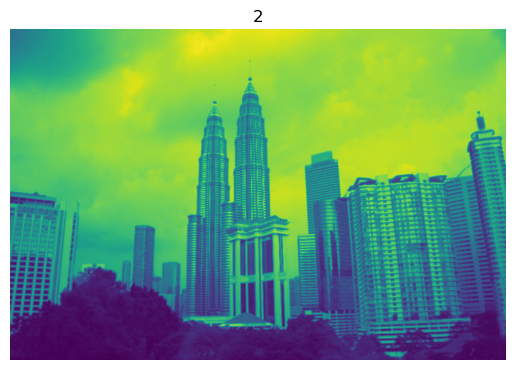

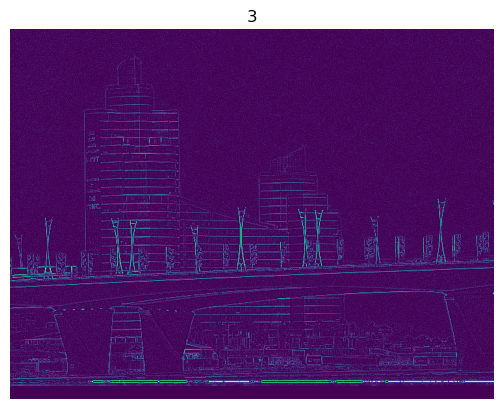

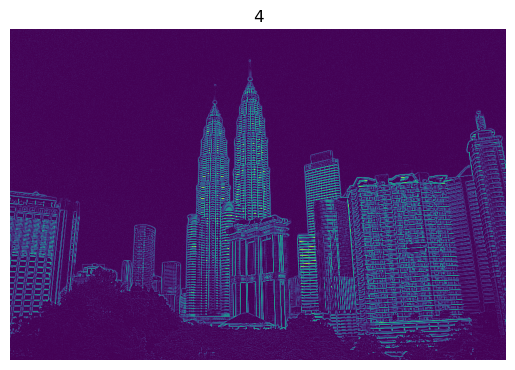

In [25]:
fig.add_subplot(2,2,1) 
plt.imshow(flpdx)
plt.axis('off')
plt.title(1)
plt.show()
fig.add_subplot(2,2,2) 
plt.imshow(flpdy)
plt.axis('off')
plt.title(2)
plt.show()
fig.add_subplot(2,2,3) 
plt.imshow(fhpdx)
plt.axis('off')
plt.title(3)
plt.show()
fig.add_subplot(2,2,4) 
plt.imshow(fhpdy)
plt.axis('off')
plt.title(4)
plt.show()
